# EDA To Prediction(DieTanic)

## Contents of the Notebook:

Part1: Explotratory Data Analysis(EDA):
1) Analysis of the features.
2) Finding any relations or trends considering multiple features.

Part2: Feature Engineering and Data Cleaning:
1) Adding any few features.
2) Removing redundant features.
3) Converting features into suitable form for modeling.

Part3: Predictive Modeling
1) Running Basic Algorithms.
2) Cross Validation.
3) Ensembling.
4) Important Features Extracion

## Part1: EDA

In [457]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # pyplot으로 변경
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore') # 경고 무시
%matplotlib inline

In [458]:
PATH = 'D:/project/study/kaggle/data/'
data = pd.read_csv(PATH + 'titanic/train.csv')

In [459]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [460]:
data.isnull().sum() # 총 null값 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked에 null 값이 있다. 이것들의 fix를 시도한다

### how many Survived??

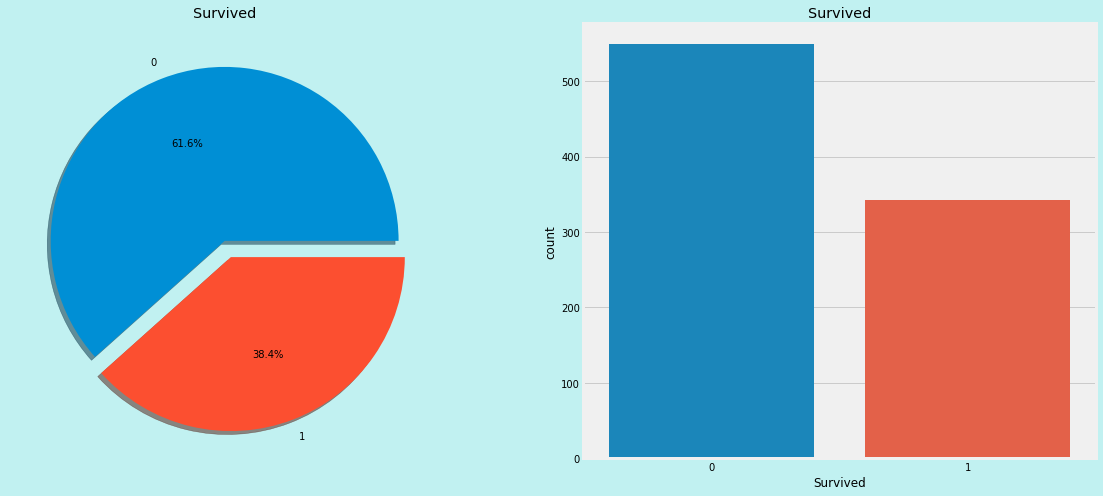

In [461]:
f, ax=plt.subplots(1, 2, figsize=(18,8), facecolor='#c1f1f1')
data['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                         autopct='%1.1f%%',
                                         ax=ax[0],
                                         shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',
              data=data,
              ax=ax[1])
ax[1].set_title('Survived')
plt.show()

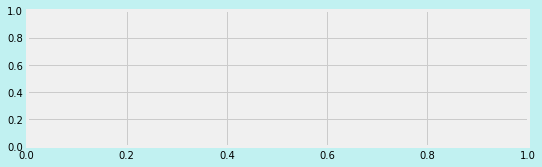

In [462]:
fig, ax = plt.subplots(figsize=(8, 2.5), facecolor="#c1f1f1")

### Types Of Features


### Analysing The Features

### Sex -> Categorical Feautre

In [463]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

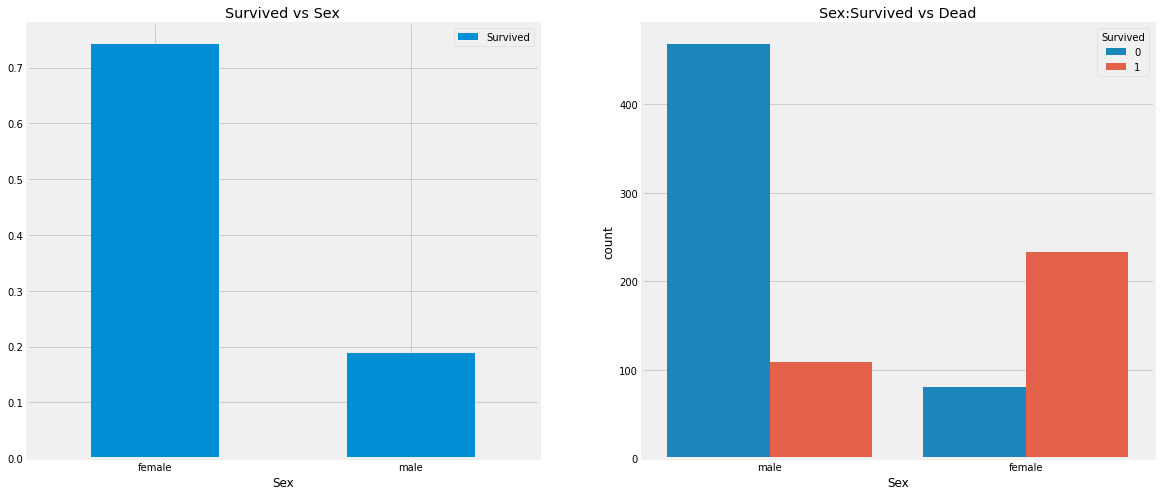

In [464]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0], rot=0) # rotate = rot

ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', 
              hue='Survived',
              data=data,
              ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

### Pclass -> Ordinal Feature

In [465]:
import jinja2

In [466]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


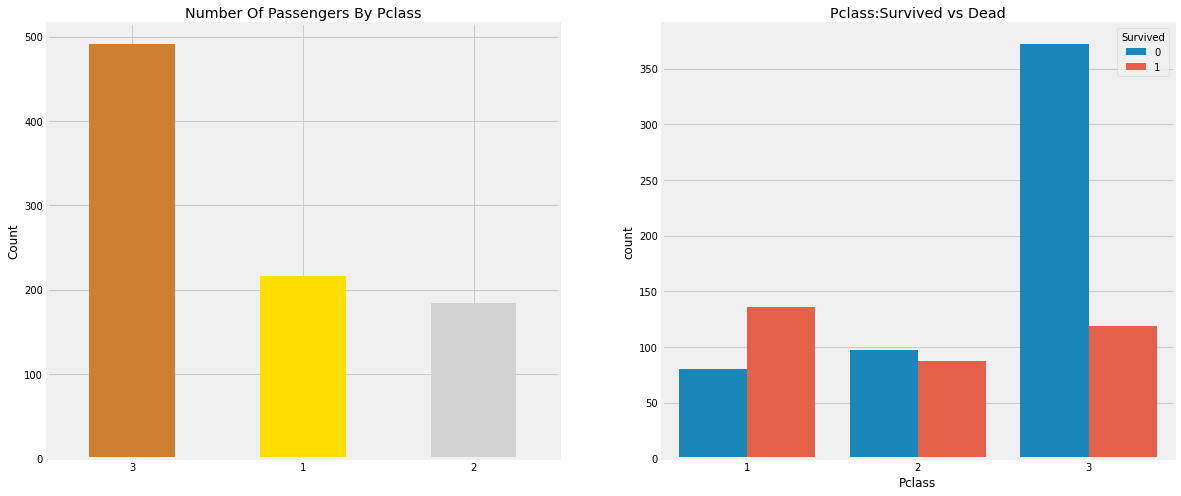

In [467]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0], rot=0)
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [468]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

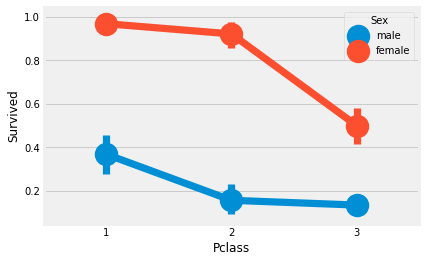

In [469]:
# sns.factorplot('Pclass','Survived', hue='Sex', data=data)
sns.pointplot('Pclass','Survived', hue='Sex', data=data)
plt.show()

### Age -> Continous Feature

In [470]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship 29.69911764705882 Years


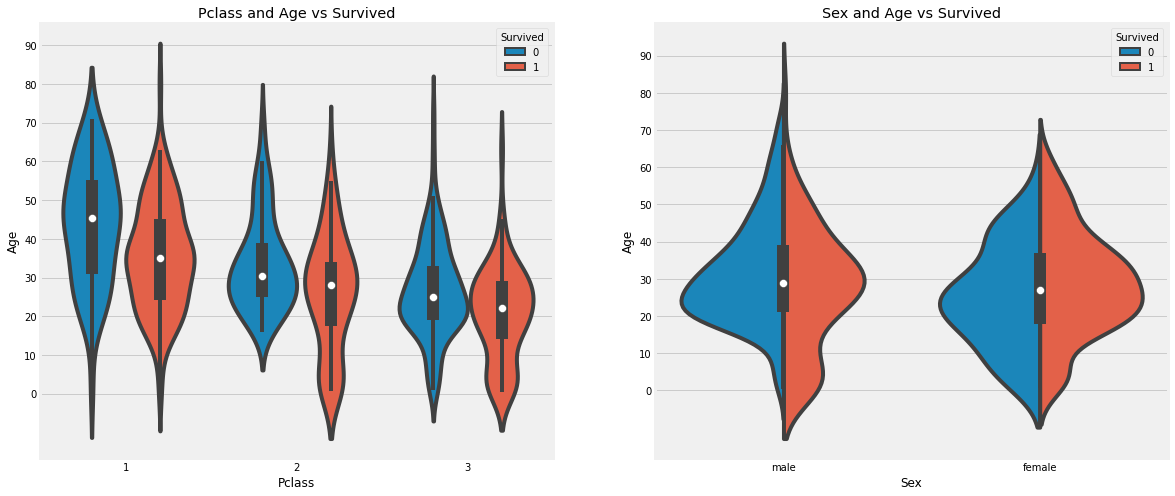

In [471]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', # x축
               'Age', # y축
               hue='Survived',
               data=data,
            #    split=True, # 하나의 바이올린에 합쳐서 표시
               ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 100, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 100, 10))
plt.show()


In [472]:
# 왜 y축이 0 아래로 내려가지?
data['Age'].describe() 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

나이에는 null값이 존재하는데, 이 부분에 대한 추론
이름에 Mr or Mrs 등으로 추정 진행

In [473]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') # 정규식으로 호칭 추출

In [474]:
data['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [475]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [476]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                        inplace=True)

In [477]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### filling NaN Ages

In [478]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=46

In [479]:
data.Age.isnull().any()

False

In [480]:
data['Age'].isnull().any()

False

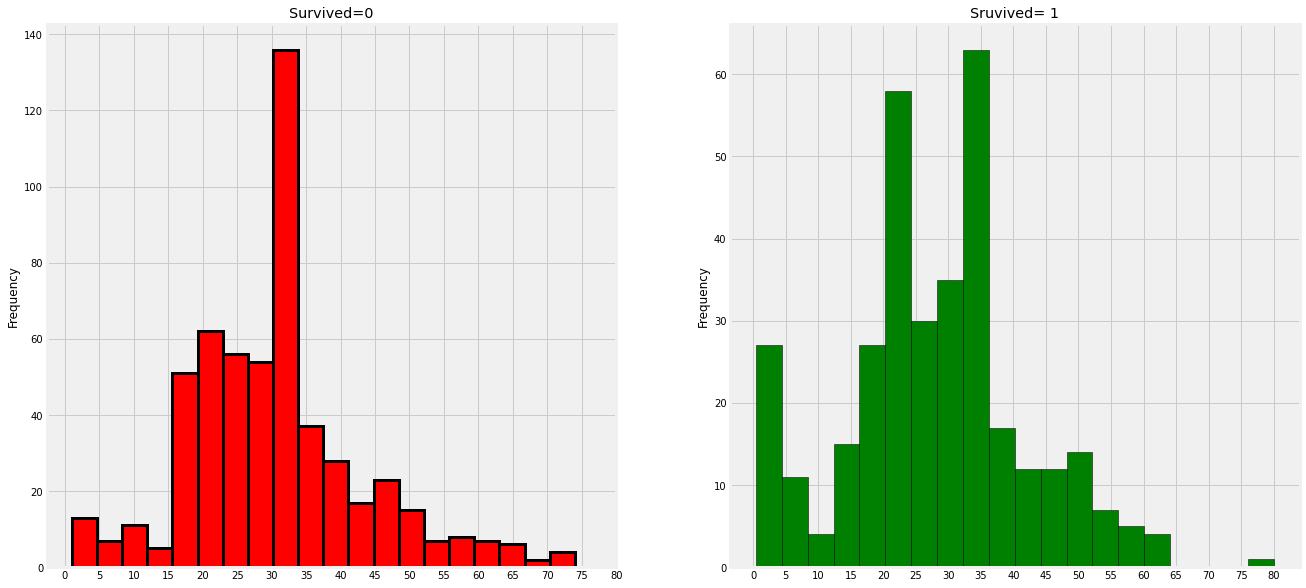

In [481]:
f,ax=plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], 
                                        bins=20, # 막대 그래프 숫자
                                        # edgecolor='black', 
                                        ec = 'black', #
                                        # linewidth=5
                                        lw=3,
                                        color='red'
                                        )
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Sruvived= 1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

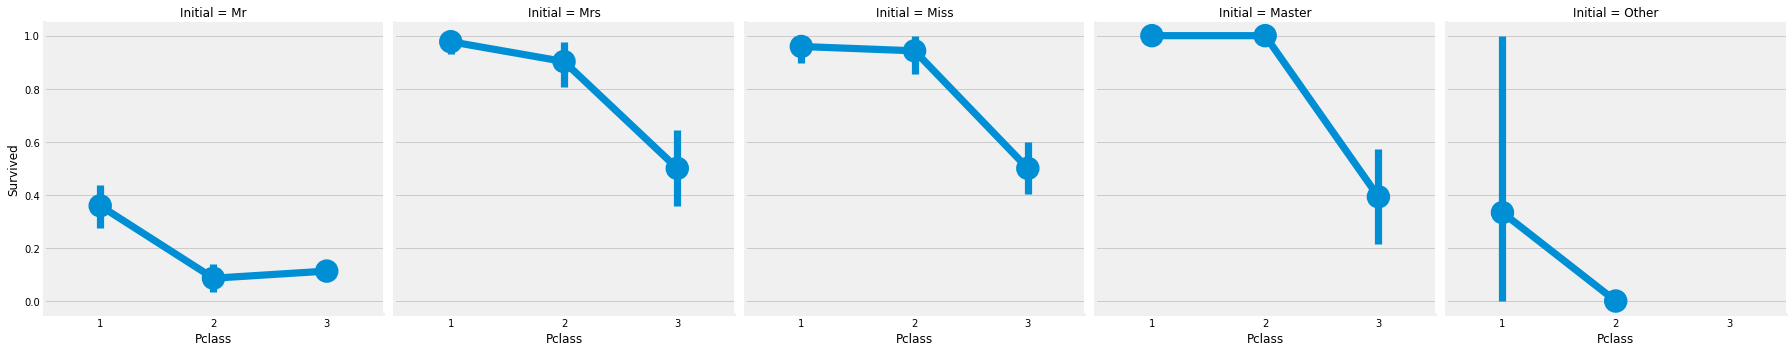

In [482]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

### Embarked -> Categorical Value

In [483]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survived bu Port Of Embarkation

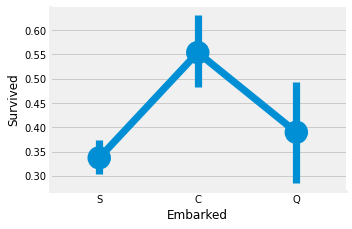

In [484]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf() # 이미 생성된 figure를 호출
fig.set_size_inches(5,3)
plt.show()

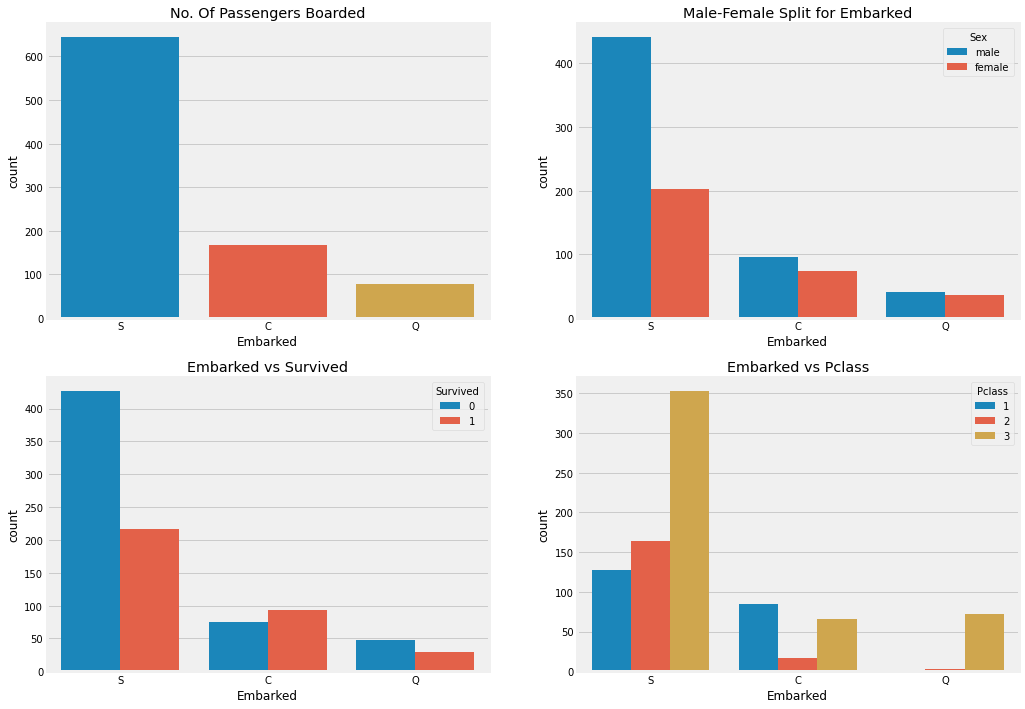

In [485]:
f, ax=plt.subplots(2, 2, figsize=(15,10))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, # 가로 여백
                    hspace=0.2, # 세로 여백
                    left=0.1,
                    right=1,
                    top=1,
                    bottom=0.1)
plt.show()

#### 관찰 정보
1. 탑승객 대부분은 S 항구에서 탑승했고 s 항구 승객은 대부분 Pclass 3이다.
2. c 항구에서 온 승객들은 상당비율 생존했다. 그 이유는 1,2등급 인원들이 구조되서 일 수 있다.
3. 대부분의 부자들(1Pclass)은 s항구에서 탑승헀다. S항구의 생존율은 낮다. 그 이유는 S항구의 3Pclass 승객 중 81% 정도가 죽었기 때문이다.
4. Q항구에서 탑승한 승객의 95%는 3Pclass다.

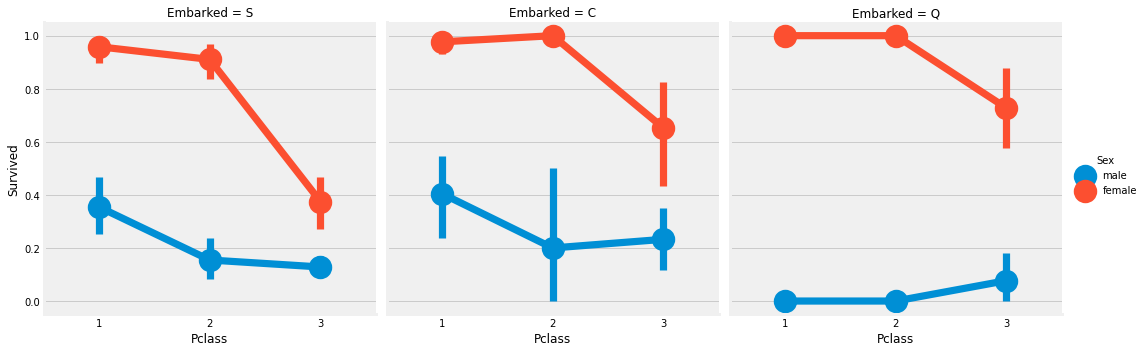

In [486]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

#### 관측 정보
1. Pclass가 1과 2인 `여성`의 생존 확률은 거의 1이다.
2. S 항구에서 탑승한 3Pclass 승객들은 생존율이 매우 낮다.
3. Q 항구에서 탑승한 대부분은 3Pclass 출신으로 남성의 생존율이 가장 낮다.

### Filling Embarked NaN
항구별 탑승객 분포를 봤을 때 NaN값을 S로 대체함

In [487]:
data['Embarked'].fillna('S', inplace=True)

In [488]:
data.Embarked.isnull().any()

False

### SibSip -> Discrete Feature


In [489]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


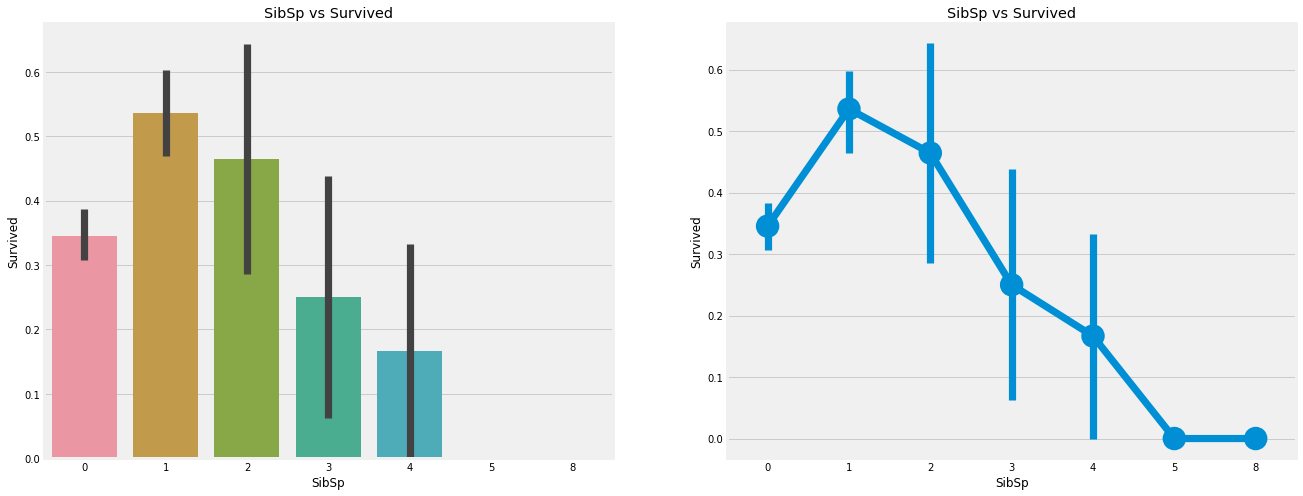

In [490]:
f,ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

# sns.factorplot('SibSp','Survived',data=data,ax=ax[1]) # factor를 point로 대체
sns.pointplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2) # figure를 닫는 메서드
plt.show()

In [491]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### 관찰 정보
그래프는 SibSp가 0인경우 생존율이 34.5%임을 보여준다.  
형자자매의 수가 증가하면 그래프는 점점 감소한다.  
구성원이 5-8인 대가족의 생존율은 0%인데, Pclass와 연관이 있어 보인다.

### Parch

In [492]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


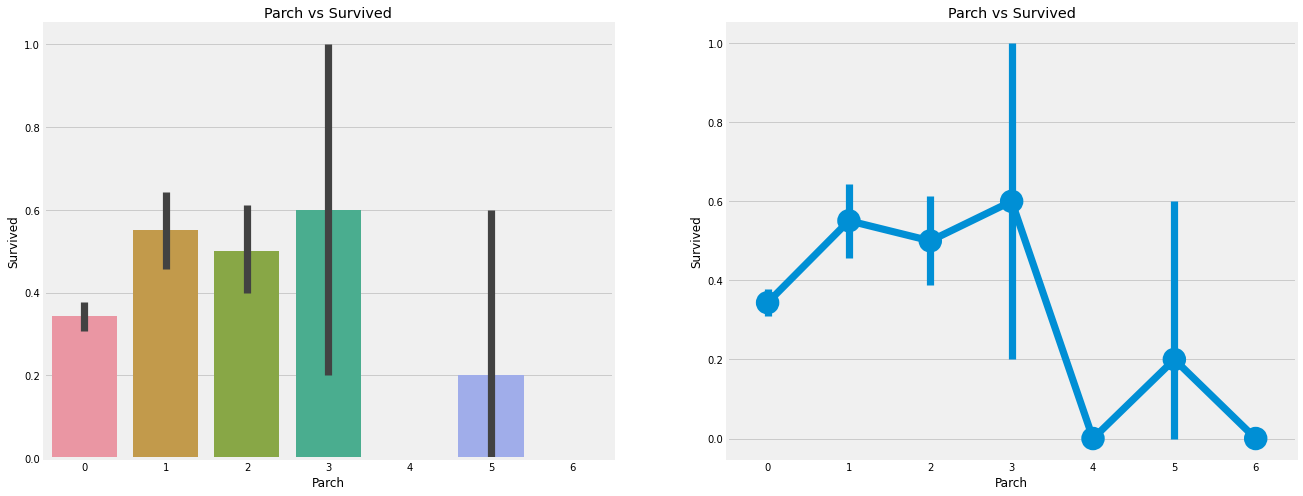

In [493]:
f,ax=plt.subplots(1, 2, figsize=(20,8))
sns.barplot('Parch','Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

# sns.factorplot('Parch', 'Survived', data=data, ax=ax[1]) # pointplot으로 대체
sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

#### 관찰 정보
부모를 태운 승객들은 생존 가능성이 더 크다.  
그러나 숫자가 증가할 수록 생존율은 감소한다.  
생존 가능성은 배에 부모가 1~3명이 있는 사람이 높다.   
혼자 탑승한 승객은 생존율이 낮으며, 부모가 4명 이상 있을때 생존율은 급감한다.

### Fare -> Continous Feature

In [494]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


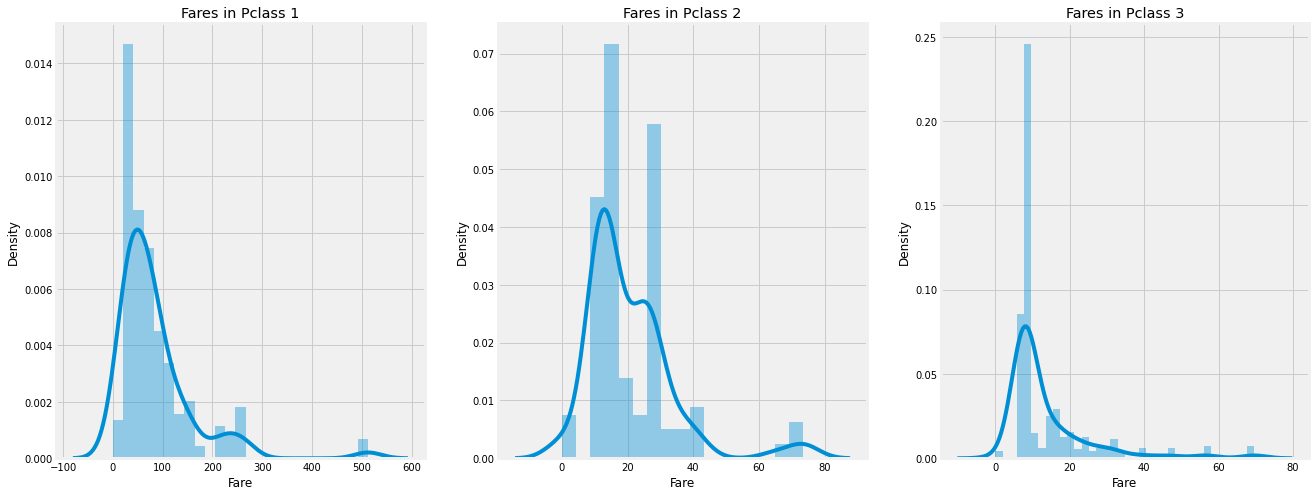

In [495]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()
# 왜 0부터 시작 안하지?

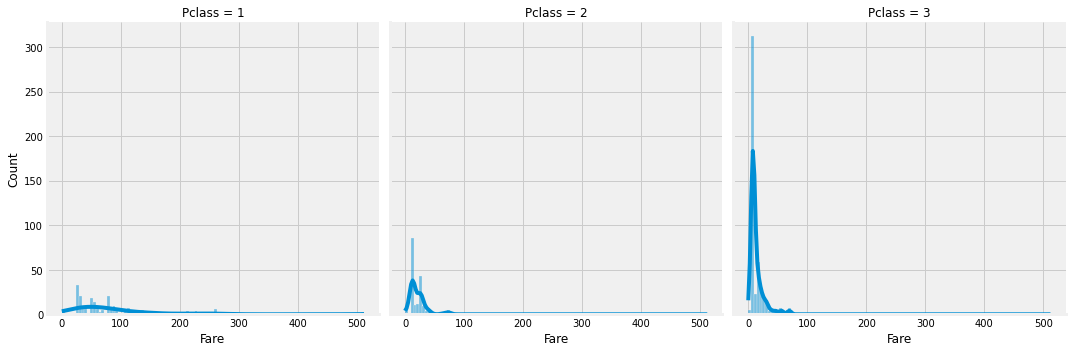

In [496]:
sns.displot(x='Fare', col='Pclass', data=data, col_wrap=3, kde=True)

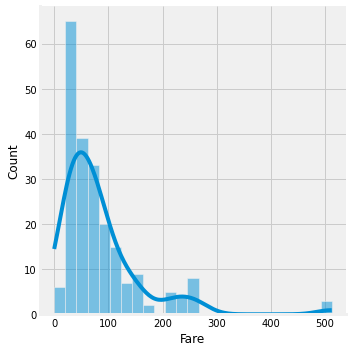

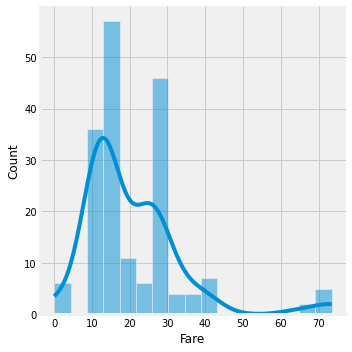

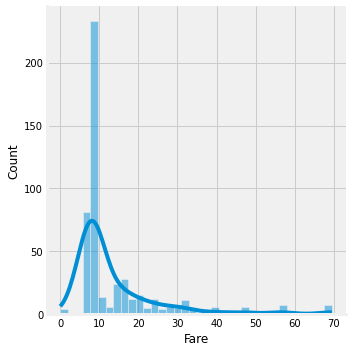

In [497]:
sns.displot(data[data['Pclass']==1].Fare, ax=ax[0], kde=True)
ax[0].set_title('Fares in Pclass 1')
sns.displot(data[data['Pclass']==2].Fare, ax=ax[1], kde=True)
ax[1].set_title('Fares in Pclass 2')
sns.displot(data[data['Pclass']==3].Fare, ax=ax[2], kde=True)
ax[2].set_title('Fares in Pclass 3')
plt.show()

### Observations in a Nutshell for all features
Sex : 여성은 남성보다 생존 가능성이 높다.   
Pclass : 1등석은 생존 가능성이 높다. 3등석은 생존율이 매우 낮다. 1, 2등석의 여성은 생존 가능성이 1에 가깝다.  
Age : 5-10세 사이의 어린이들은 생존 가능성이 높다. 15-35세 사이의 승객들이 많이 죽었다.  
Embarked : 생존 가능성은 c 항구가 s보다 더 높아보인다. Q항구에서 탑승한 승객은 전부 3등석이다.  
Parch+SibSp : 형제자매 1-2명, 배우자 1-3명이 있는 경우가 혼자거나 대가족인 케이스보다 높은 생존율을 보인다.

### Correlation Between The Features

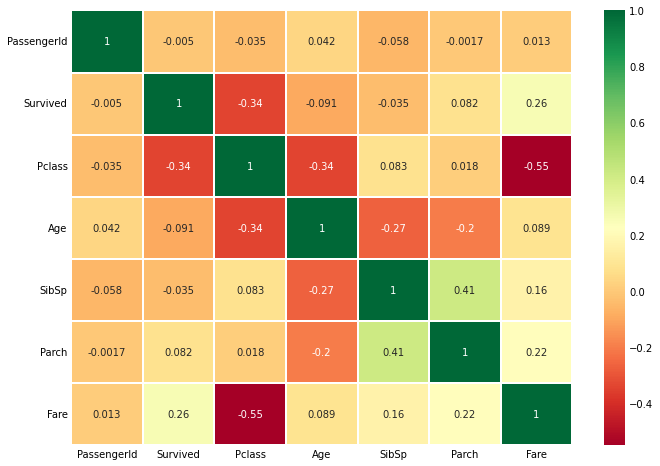

In [498]:
sns.heatmap(data.corr(),
            annot=True,
            cmap='RdYlGn',
            linewidths=0.2) 
plt.xticks(rotation = 0)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### 히트맵 해석

* 알파벳이나 문자열 사이에는 상관관계가 없기에 숫자만 비교된다.
* A의 증가가 B의 증가로 이어진다면 양의 상관관계를 가진다. 1이 최대
* A의 증가가 B의 감소로 이어지면 음의 상관관계를 가진다. -1이 최대
* 특정 피쳐들이 완벽하게 상관관계에 있어서 한 피쳐의 증가가 다른 피쳐의 증가로 이어진다면 이 두 피쳐는 매우 유사한 정보를 갖고 있고 정보의 차이가 거의 없다고 볼 수 있다.= 다중공선성   
* 이렇게 중복되는 피쳐는 하나를 제거해준다. 다중공선성
* 

## Part2: Feature Engineering and Data Cleaning

데이터셋에서 제공되는 모든 컬럼들이 중요할 필요는 없다.  
제거해야 할 중복되는 컬럼들이 있을수도 있고,   
기존의 컬럼에서 새로운 정보를 추출 할 수도,  
데이터셋에 없던 정보를 가져와야 할 수도 있다.  
이 과정이 피쳐 엔지니어링

### Age_band

In [499]:
data['Age_band']=0 # 컬럼 생성

data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [500]:
data['Age_band'].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

In [501]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
# to_frame() 시리즈를 데이터프레임으로 변경

,Age_band
1,382
2,325
0,104
3,69
4,11


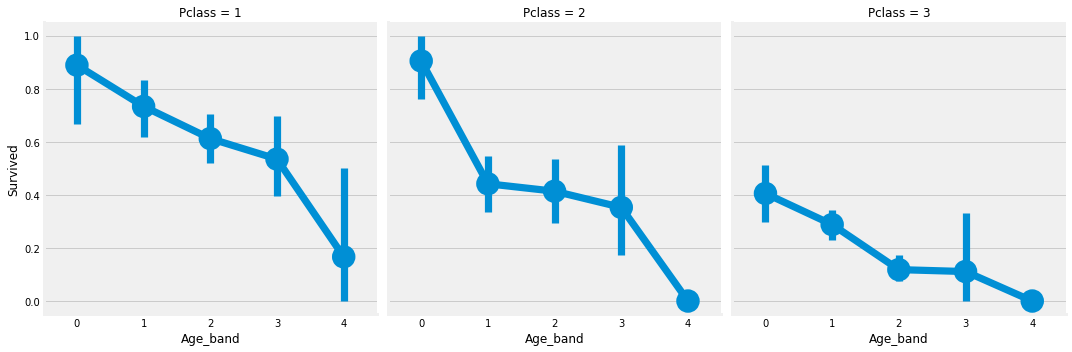

In [502]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

### Family_Size and Alone

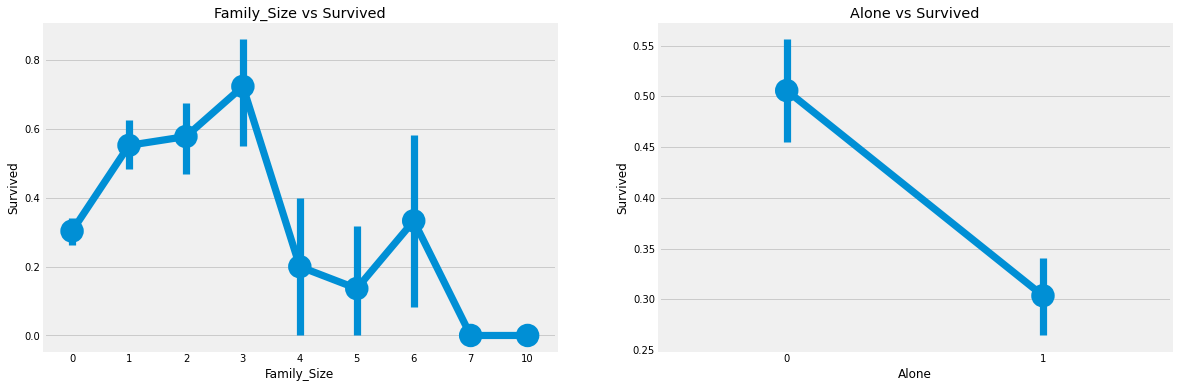

In [503]:
data['Family_Size']=0

data['Family_Size']=data['Parch'] + data['SibSp'] # family size
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1 # family_size가 0이면 alone

f,ax=plt.subplots(1, 2, figsize=(18, 6))
# sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
sns.pointplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
# sns.factorplot('Alone','Survived',data=data,ax=ax[1])
sns.pointplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_size가 0이면 혼자인 승객을 의미함  
혼자라면 생존율이 매우 낮다.

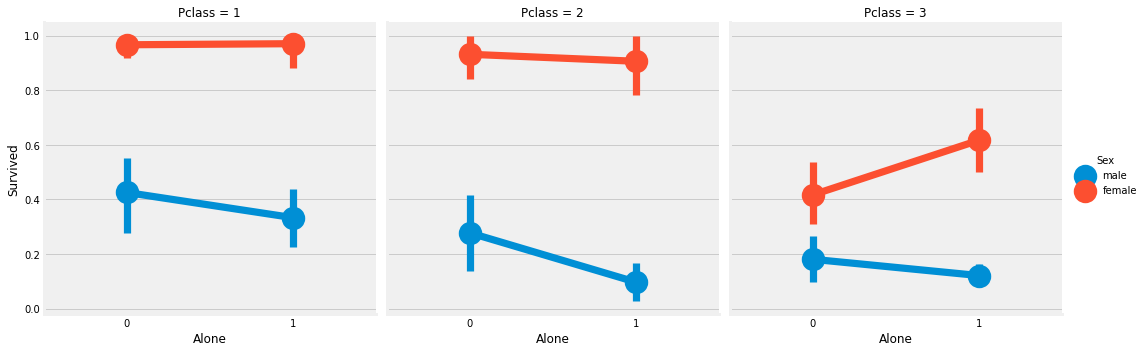

In [504]:
sns.factorplot('Alone','Survived', data=data, hue='Sex', col='Pclass')
plt.show()

pclass3의 여성을 제외하면 pclass, sex 에 상관없이 alone인 경우 생존율이 낮은걸 볼 수 있다.

### Fare_Range

연속적인 fare 값을 pandas qcut을 이용하여 범주화

In [505]:
data['Fare_Range']=pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [506]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_cat']=3

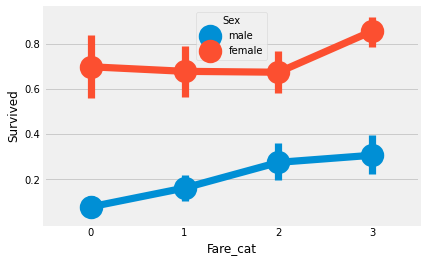

In [507]:
sns.pointplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

### Converting String Values into Numeric

model은 문자열을 인식할 수 없기에 sex, embarked 같은 기능을 수치로 변환해야 한다.

In [508]:
data['Sex'].replace(['male','female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

#### Dropping UnNeeded Features

Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.

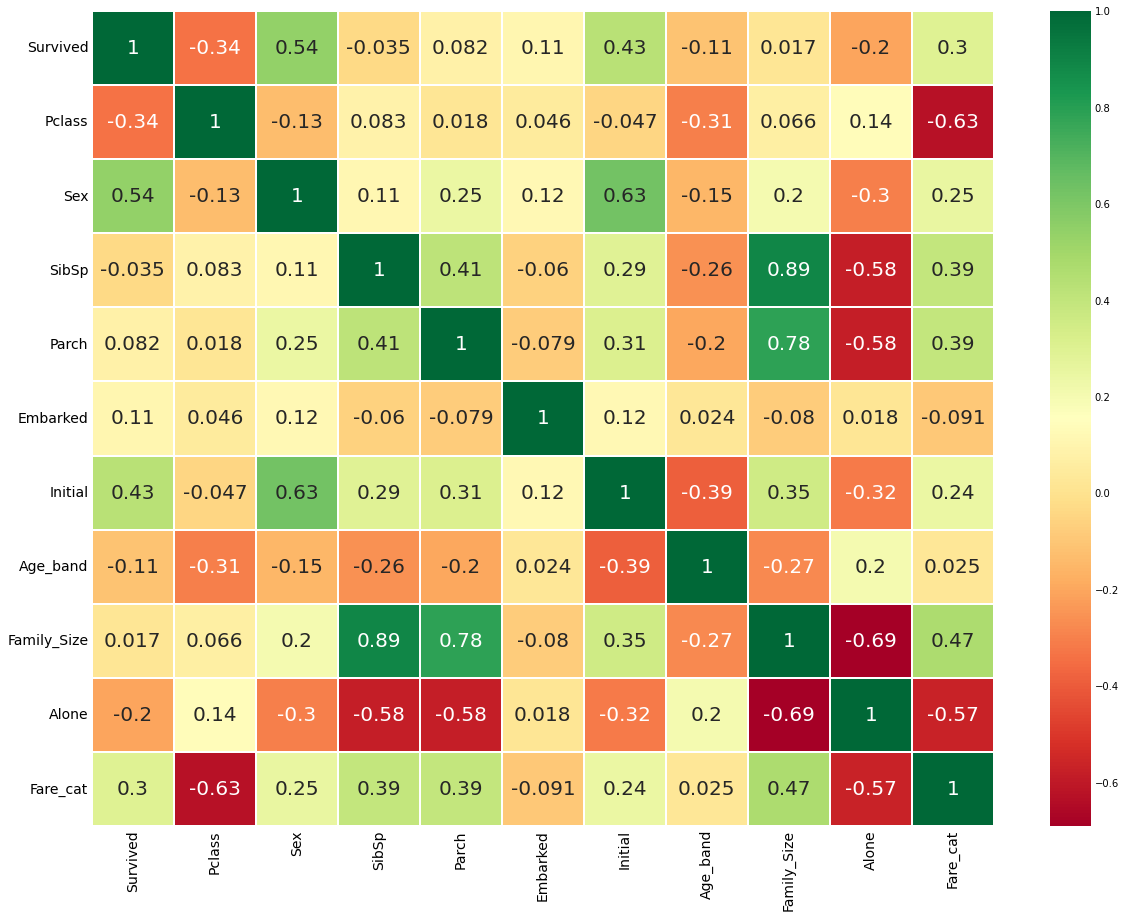

In [509]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Predictive Modeling

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [510]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [511]:
train,test = train_test_split(data,
                            test_size=0.3,
                            random_state=0,
                            stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [512]:
model=svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [513]:
model=svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [514]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [515]:
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7947761194029851


### K-Nearest Neighbours(KNN)

In [516]:
model=KNeighborsClassifier(n_neighbors=5) 
model.fit(train_X, train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


knn 모델의 n_neighhbors 값은 기본이 5이다. n_neighhbors 의 변화에 따라 정확도의 변화를 확인해봄

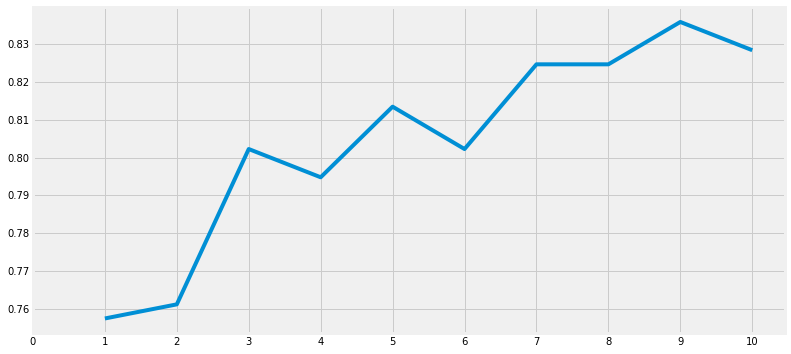

Accuracies for different values of n are: [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821] with the max value as  0.835820895522388


In [517]:
a_index=list(range(1,11)) # 정확도를 담을 빈 시리즈
a=pd.Series() # 정확도를 담을 빈 시리즈
x=[0,1,2,3,4,5,6,7,8,9,10] # x축

for i in list(range(1,11)): # n_neighhbors 값의 for 문
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
    
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())

### Gaussian Naive Bayes

In [518]:
model=GaussianNB()
model.fit(train_X, train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [519]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8134328358208955


모델의 정확도가 분류기가 얼마나 잘 작동하는지를 결정하는 유일한 요소는 아니다.  
훈련 데이터에 대해 훈련하고 테스

## Cross Validation

데이터의 불균형 해소방법
1. `K-Fold Cross Validation` 은 데이터 셋을 k-subset으로 분할하여 작동함.  
2. 데이터 집합을 k=5로 나눈다고 가정했을 때 test를 위해 1개의 부분을 예약하고 4개 파트에 걸쳐 알고리즘을 훈련한다.  
3. 테스트 파트를 다른 파트로 변경해가며 동일하게 알고리즘 훈련을 반복하고 정확도와 에러는 평균화한다.
4. 


In [520]:
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction

In [521]:
# kfold = KFold(n_splits=10, random_state=22)
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(),
        GaussianNB(),
        RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, 
                                cv = kfold,
                                scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std}, index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813770,0.042219
Decision Tree,0.809238,0.026757
Naive Bayes,0.801386,0.028999
Random Forest,0.815968,0.032046


<AxesSubplot:>

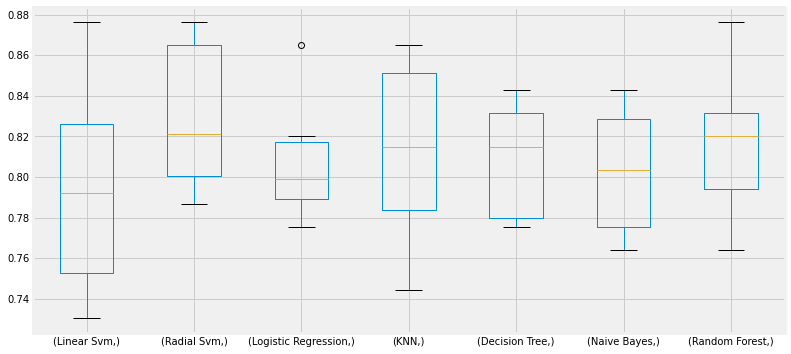

In [522]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

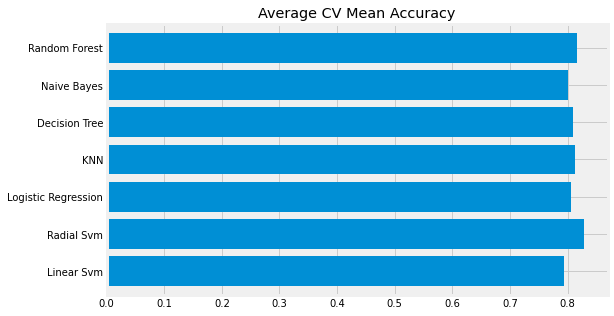

In [523]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### Confusion Matrix

분류기가 판단한 정확한 예측이나 잘못된 예측의 수를 제공

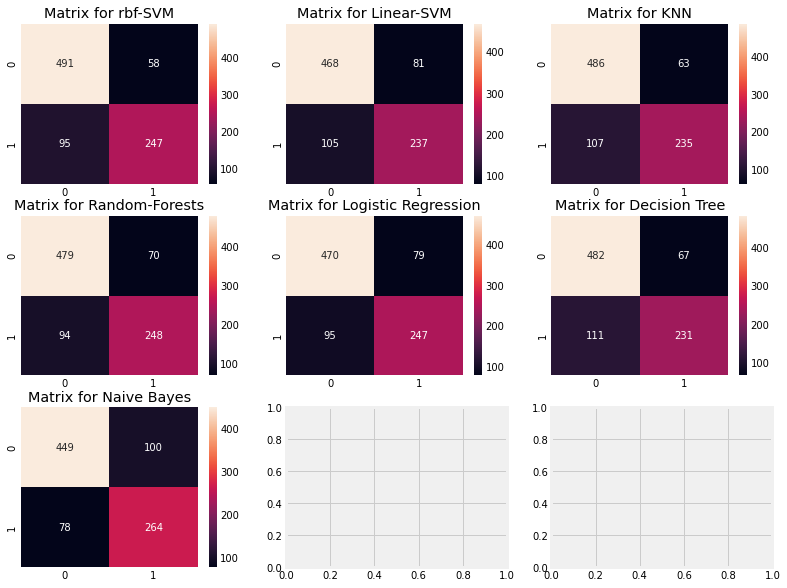

In [524]:
f,ax=plt.subplots(3, 3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

#### Interpreting Confusion Matrix
좌상단에서 우하단으로 긋는 대각선은 정확한 예측수를 나타내며, 우상단에서 좌하단으로 긋는 대각선은 잘못된 예측수를 나타낸다.

1. 정확한 예측은 491 + 247 이며 평균 CV 정확도는 (491+247)/891 = 82.8%이다.
2. 에러는 58명의 사망자를 생존자로 잘못 분류하고 95명은 사망자지만 생존했다. 죽은 사람을 생존자로 예측하는 부분에서 더 많은 실수가 있었다.

rbf-SVM은 사망한 승객을 정확하게 예측할 가능성이 더 높고  
Naive Bayes는 생존한 승객을 정확하게 예측할 가능성이 더 높다.

#### Hyper-Parameters Tuning

##### SVM

In [525]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf', 'linear']

hyper={'kernel':kernel, 'C':C, 'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(), # 사용할 모델
                param_grid=hyper, # 튜링을 위해 사용될 파라미터를 딕셔너리 형태로 만들어서 넣는다.
                # scoring='accuracy' 예측 성능을 평가할 평가 방법
                # cv= 교차 검증에서 몇개로 분할할지 지정. 디폴트 값은 cv=3
                # refit=True True로 하면 최적의 하이퍼 파라미터를 찾아서 재학습시킨다. 디폴트가 True
                verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


##### Random Forests

In [526]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), 
                param_grid=hyper,
                verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


GridSearchCV?  
사이킷런에서 제공하는 클래스로 하이퍼파라미터 값을 순차적으로 입력하여 학습하고 측정하면서 가장 좋은 파라미터를 찾아준다.  
grid 파라미터(=`param_grid`) 안에서 집합을 만들고 적용이 가능하다

## Ensembling

단순 모델들을 조합하여 모델의 정확도나 성능을 높이는 방법

1) Voting Classifier
2) Bagging
3) Boosting.

### Voting Classifier 

보팅은 다양한 단순 모델들의 예측을 결합하는 간단한 방법이다.  
하위 모델의 예측을 기반으로 평균 예측 결과를 제공한다.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [527]:
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True, kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500, random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear', probability=True))
                                             ], 
                                  voting='soft').fit(train_X,train_Y) # soft, hard

print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = "accuracy")
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8215480649188514


### Bagging

배깅은 일반적인 앙상블 방식이다.  
데이터 세트의 작은 파티션에 유사한 분류기(=동일한 알고리즘을 사용하는 모델)를 적용한 다음 모든 예측의 평균을 취한다.  
평균화로 인해 분산이 감소하며, 보팅과 다른점은 동일한 알고리즘을 사용한다. = random forest

#### Bagged KNN

배깅은 분산이 높은 모형에서 가장 잘 작동한다.

In [528]:
from sklearn.ensemble import BaggingClassifier

In [529]:
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                        random_state=0,
                        n_estimators=700)

model.fit(train_X,train_Y)
prediction=model.predict(test_X)

print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


#### Bagged DecisionTree

In [530]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        random_state=0,
                        n_estimators=100)

model.fit(train_X, train_Y)
prediction=model.predict(test_X)

print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

모델은 먼저 전체 데이터 셋트에 대해 훈련된다. 이제 모델은 일부는 맞추고 일부는 틀린다.  
다음 반복에서 틀린 예측 사례에 대해 더 집중하거나 비중을 높인다.  
잘못된 예측을 바르게 예측하기 위해 노력하며, 이 프로세스는 연속적으로 정확도가 한계에 도달할 때 까지 새로운 분류기가 모델에 추가된다.

#### AdaBoost(Adaptive Boosting)

In [531]:
from sklearn.ensemble import AdaBoostClassifier

In [532]:
ada=AdaBoostClassifier(n_estimators=200,
                       random_state=0,
                       learning_rate=0.1)

result=cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting

In [533]:
from sklearn.ensemble import GradientBoostingClassifier

In [534]:
grad=GradientBoostingClassifier(n_estimators=500,
                                random_state=0,
                                learning_rate=0.1)

result=cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [535]:
import xgboost as xg

In [536]:
xgboost=xg.XGBClassifier(n_estimators=900,
                         learning_rate=0.1)

result=cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


#### Hyper-Parameter Tuning for AdaBoost

3가지 부스팅 중 성능이 가장 높았던 아다부스트에 대해 하이퍼 파라미터를 최적화 해본다.

In [537]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}

gd=GridSearchCV(estimator=AdaBoostClassifier(),
                param_grid=hyper,
                verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


### Confusion Matrix for the Best Model

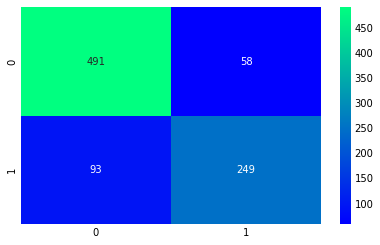

In [538]:
ada=AdaBoostClassifier(n_estimators=200,
                       random_state=0,
                       learning_rate=0.05)

result=cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result),
            cmap='winter',
            annot=True,
            fmt='2.0f')
plt.show()

## Feature Importance

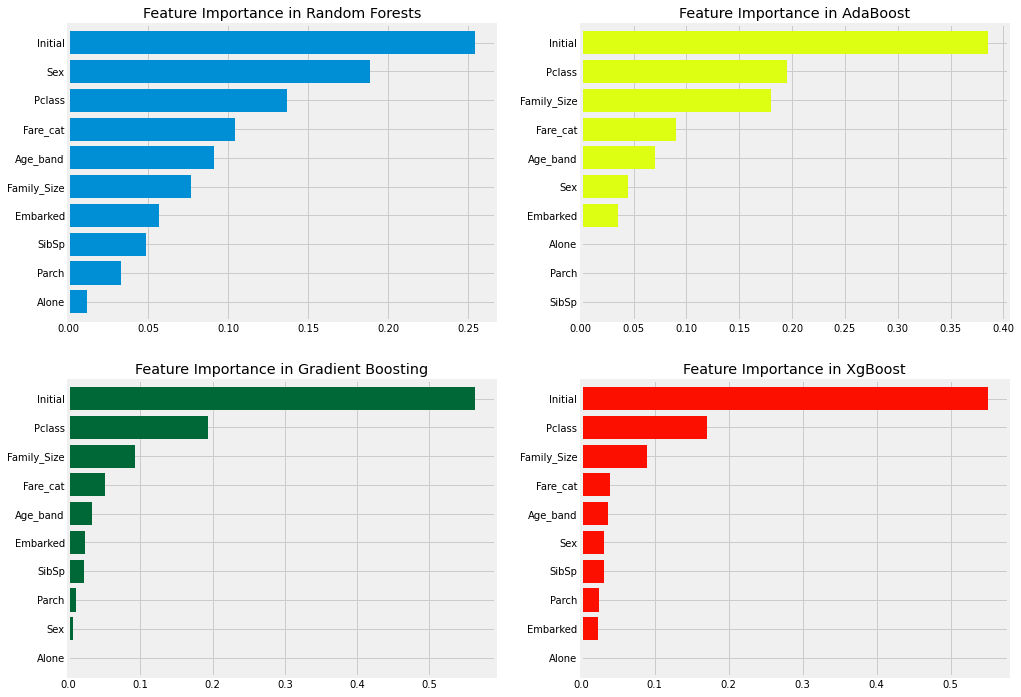

In [539]:
f,ax=plt.subplots(2, 2, figsize=(15,12))

model=RandomForestClassifier(n_estimators=500, 
                             random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,
                         learning_rate=0.05,
                         random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8,
                                                                                      ax=ax[0,1], 
                                                                                      color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,
                                 learning_rate=0.1,
                                 random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8,
                                                                                      ax=ax[1,0],
                                                                                      cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,
                       learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8,
                                                                                      ax=ax[1,1],
                                                                                      color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

#### 관찰 정보

1. 대부분의 모델에서 initial, Pclass, Family_size, Fare_cat이 중요한 피쳐이다.
2. Sex는 중요도가 높지 않은걸로 나왔는데, EDA에서 과정에서 확인했던 것과 다른점이 충격적이다.  
Initial이 이미 sex와 양의 상관관계를 보이고, 성별을 포함하기 때문에 그런것으로 보인다.
3. 동일하게 Pclass와 Fare_cat은 승객의 상태와 family_size, alone, Parch 및 sibsp를 나타낸다.